# Pathway profiles

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate as intpol
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [2]:
def load_paths(sysname):
    """Load the barrier data."""
    basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    energy  = numpy.load(f"{basedir}/ges_imi.{sysname}.ener.npy")
    
    return energy.reshape(-1, 36)

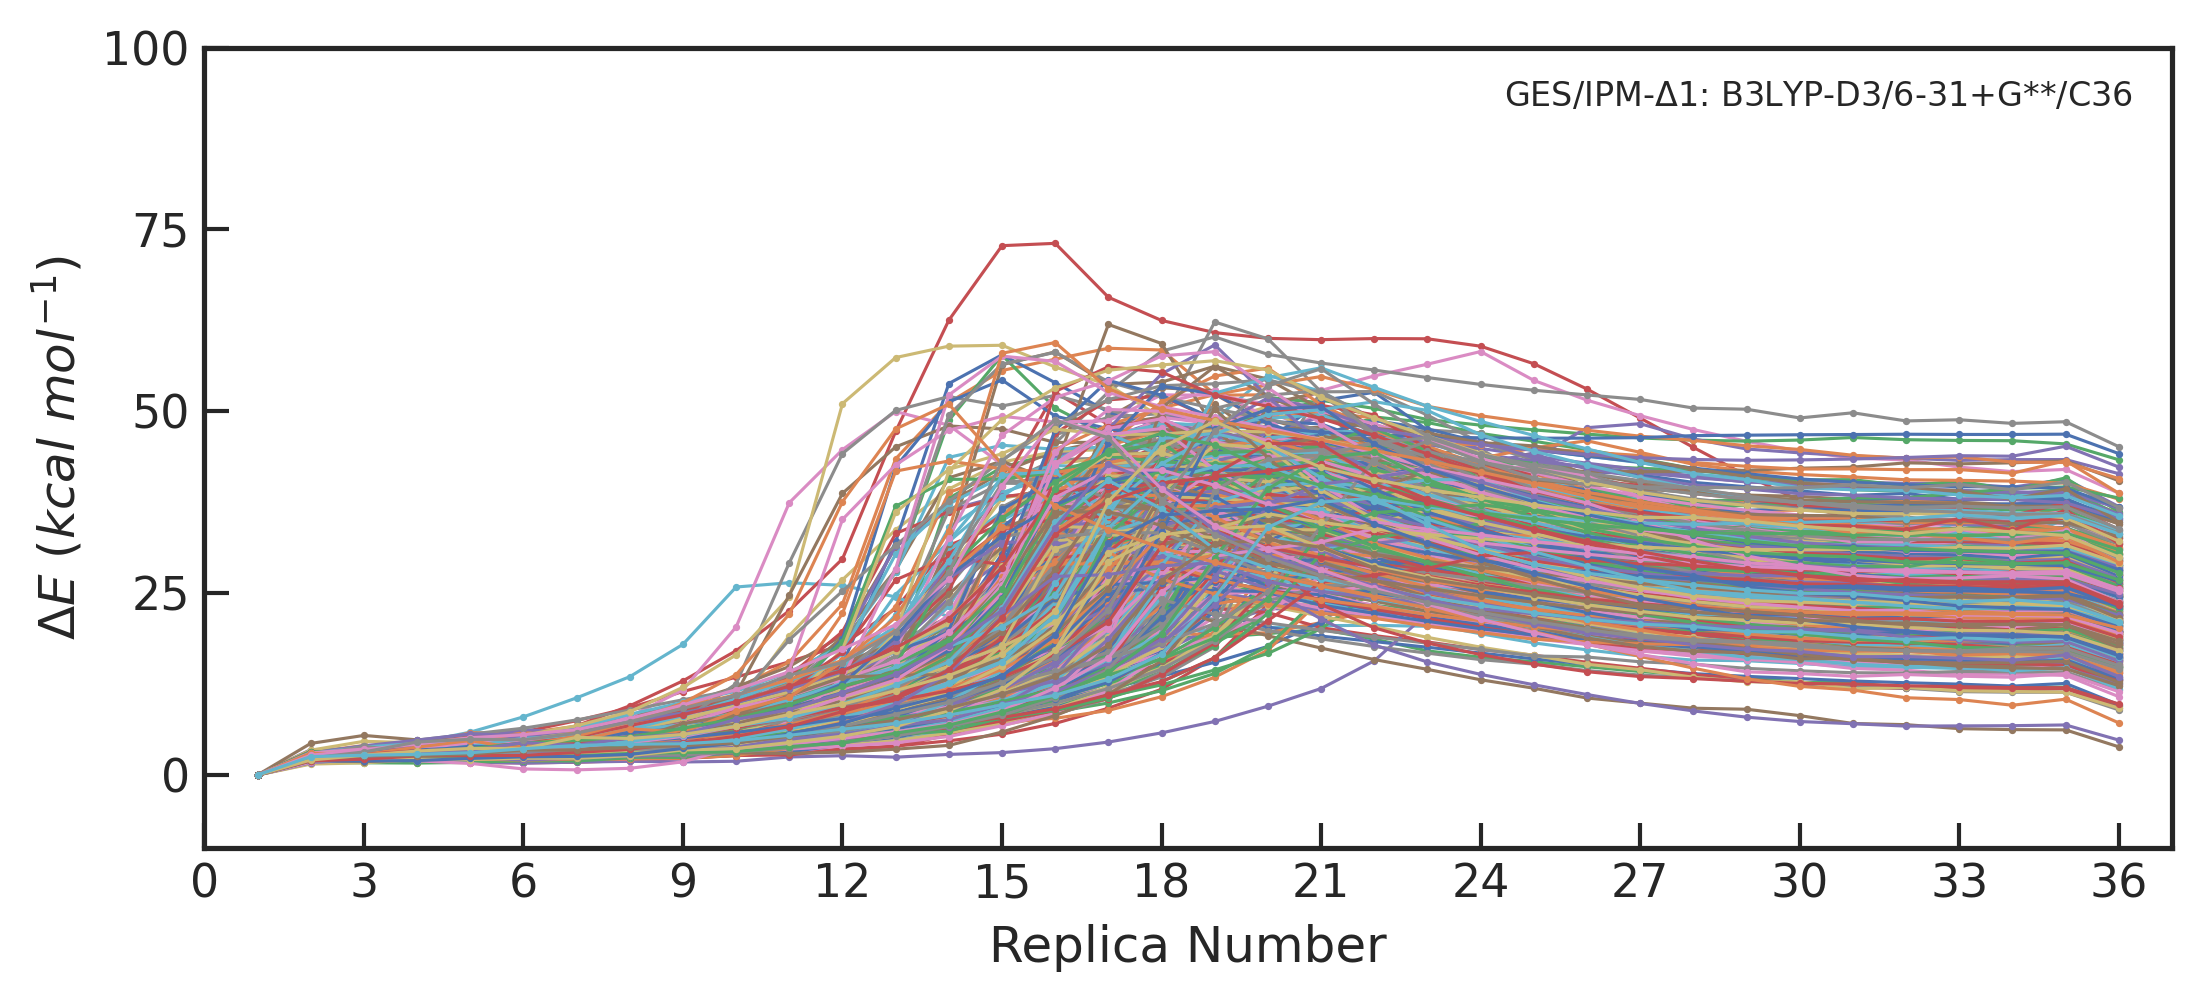

In [12]:
# init figure ==================================================================

fig, ax,  = plt.subplots(figsize=(7.5, 3.5), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1./7.5, right=7.25/7.5, top=3./3.5, bottom=.5/3.5)


# spine    
ax.set_xlim(0, 37)
ax.set_ylim(-10, 100)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
plt.xticks([3*x for x in range(13)])
plt.yticks([y for y in range(0, 101, 25)])

ax.set_xlabel(r'Replica Number')
ax.set_ylabel(r'$\Delta$$E$'+r' $(kcal$ $mol^{-1})$')

# tick & labels on x and y
ax.tick_params(which='major', direction='in', length=6, width=1)

# load dftb data ================================================================
sysname='d1'

paths = load_paths(sysname)

ax.text(0.98, 0.96,
        r"GES/IPM-$\Delta$"+sysname[1]+": B3LYP-D3/6-31+G**/C36", 
        ha='right', va='top', transform=ax.transAxes, fontsize=8)

for p in range(500):
    ax.plot([x for x in range(1, 37)], paths[p] - paths[p][0], ls='-', marker='.', markersize=1.5, linewidth=0.75)

# ax.plot([0, 50], [mean, mean], c=colors[0], ls='-', linewidth=1, zorder=1, )
# ax.plot([0, 50], [exav, exav], c=colors[1], ls='-', linewidth=1, zorder=1, )
plt.tight_layout()
fig.savefig('ges_imi.{0}.pathways.png'.format(sysname))
plt.show()